<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

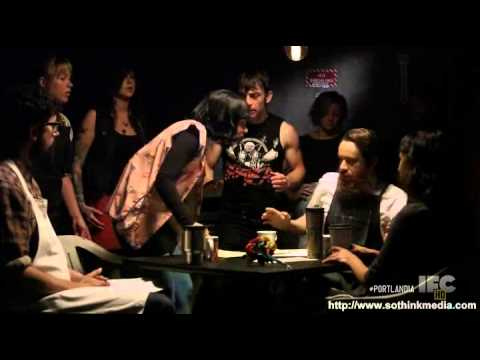

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\patch\\repos\\lambda_repos\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [22]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [23]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

## Cleaning and analysis

In [24]:
# Changing 'star_rating' to float
## This takes the first 3 characters of the 'star_rating' string and converts it to a float
shops['star_rating'] = shops['star_rating'].apply(lambda x: float(x[:3]))

In [25]:
# Creating new 'date' column
## Makes column of section of text that contains at least all of the datetime data
shops['date'] = shops['full_review_text'].apply(lambda x: x[:11])
## splits by blank space, then takes the first split, which is date, and converts to dt
shops['date'] = shops['date'].apply(lambda x: pd.to_datetime(x.split()[0]))

In [26]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03


In [27]:
shops['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [28]:
# Just observing which coffee shops have the highest rating.
shops.groupby('coffee_shop_name').mean().sort_values(by='star_rating', ascending=False).head()

,star_rating
coffee_shop_name,
The Marvelous Vintage Tea Party Co.,5.000000
Lola Savannah Coffee Downtown,5.000000
Mañana Coffee & Juice,4.848485
Brian’s Brew,4.844444
Third Coast Coffee Roasting Company,4.821429


## Tokenizing data

In [29]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [30]:
tokens = []

# Looks like this tokenizes all of the text in the full_review_text column,
#then assigns tokens to each review
for review in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    review_tokens = [token.text for token in review]
    tokens.append(review_tokens)

shops['tokens'] = tokens

In [31]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 27779),
 ('and', 25748),
 (' ', 22606),
 ('a', 22085),
 ('I', 19780),
 ('to', 16904),
 ('of', 12495),
 ('is', 11748),
 ('was', 9539),
 ('in', 8901)]

In [32]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [33]:
# Use the Function
wc = count(shops['tokens'])

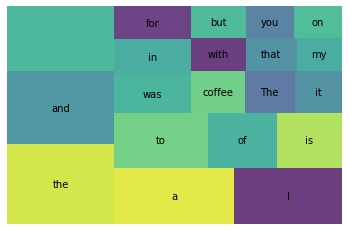

In [34]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [35]:
# Removing empty space and in full review
shops['tokens'] = shops['tokens'].apply(lambda x: x[2:])

## Removing stopwords

In [36]:
tokens = []

""" Update those tokens w/o stopwords"""
for review in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in review:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [37]:
# Use the Function
wc = count(shops['tokens'])

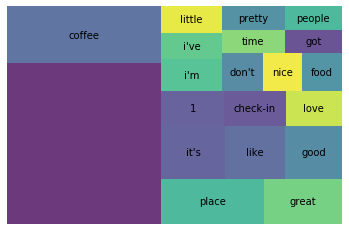

In [38]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [39]:
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,,7616,22606,1.0,0.053592,0.053592,1.000000
23,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
104,place,3029,4264,3.0,0.010109,0.082803,0.397715
73,great,2438,3250,4.0,0.007705,0.090508,0.320116
279,it's,2061,3117,5.0,0.007389,0.097897,0.270614
188,like,2034,2902,6.0,0.006880,0.104777,0.267069
178,good,2084,2779,7.0,0.006588,0.111365,0.273634
6,1,1998,2035,8.0,0.004824,0.116190,0.262342
45,check-in,1957,1961,9.0,0.004649,0.120839,0.256959
0,love,1434,1806,10.0,0.004281,0.125120,0.188288


## Including additional stop words to remove

In [40]:
STOP_WORDS = nlp.Defaults.stop_words.union(
    [" ", "it's","1","check-in","i'm","i've","don't","got","like","place","little",
     "people","coffee","check-ins","food","-","definitely"]
)

In [41]:
tokens = []

for review in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in review: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [42]:
# Use the Function
wc = count(shops['tokens'])

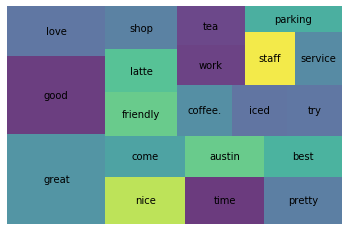

In [43]:
#This is looking a lot better now.
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Acquiring lemmas for remaining words

In [44]:
#This function will get the lemmas for each word remaining in the dataframe
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_!= '-PRON-'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [45]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

I'll analyze the tokens by star rating.


In [46]:
import squarify
import matplotlib.pyplot as plt

In [47]:
good_rating = shops[shops['star_rating'] > 3]

In [48]:
bad_rating = shops[shops['star_rating'] <= 3]

### Good Rating exploration

In [49]:
# Use the Function
wc_good = count(good_rating['lemmas'])

In [50]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
189,good,2944,4395,1.0,0.016461,0.016461,0.479479
61,great,2497,3459,2.0,0.012956,0.029417,0.406678
17,check,2686,2941,3.0,0.011015,0.040432,0.437459
1,love,1586,2083,4.0,0.007802,0.048234,0.258306
38,Austin,1543,1986,5.0,0.007439,0.055673,0.251303


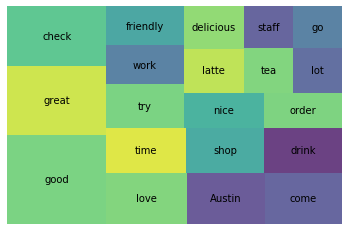

In [51]:
wc_good_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Bad Rating exploration

In [52]:
# Use the Function
wc_bad = count(bad_rating['lemmas'])

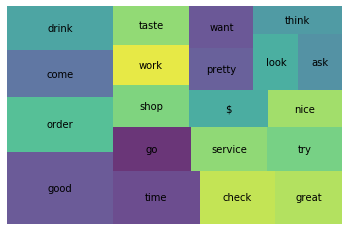

In [53]:
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [54]:
wc_compare = wc_good.merge(wc_bad, on='word')

In [63]:
wc_compare = wc_compare[['word','pct_total_x','pct_total_y']]
wc_compare.columns = ['word','good_wc_pct', 'bad_wc_pct']

In [64]:
wc_compare['difference'] = wc_compare['good_wc_pct'] - wc_compare['bad_wc_pct']

In [77]:
wc_differences = wc_compare.sort_values(by='difference')

In [79]:
wc_concat = pd.concat([wc_differences.head(5), wc_differences.tail(5)])

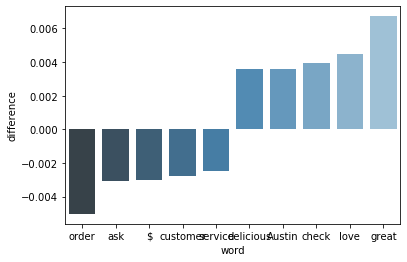

In [86]:
sns.barplot(x='word',y='difference',data=wc_concat,
           palette="Blues_d");

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

